In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [27]:
import glob
CSV=glob.glob('../*summary*csv')
CSV1=glob.glob('../*csv')


In [28]:
CSV1

['../flu.year_summary.csv',
 '../hcov.year_summary.csv',
 '../rsv.year_summary.csv',
 '../flu.per_sequence.csv',
 '../pox.per_sequence.csv',
 '../pox.year_summary.csv',
 '../ecoli.per_assembly.csv',
 '../ecoli.year_summary.csv',
 '../salmonella.per_sequence.csv',
 '../rsv.per_sequence.csv',
 '../salmonella.year_summary.csv',
 '../hcov.per_sequence.csv']

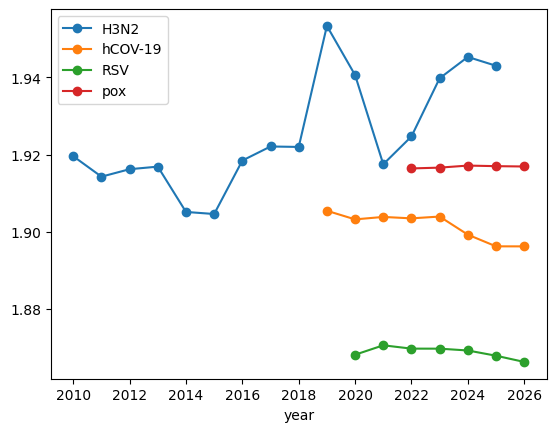

In [22]:
ax=pd.read_csv(CSV[0]).set_index('year')[['avg_bits_per_base_corrected']].plot(style='-o',
                                                                              label='H3N2')
pd.read_csv(CSV[1]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='hCOV-19')
pd.read_csv(CSV[2]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='RSV')
pd.read_csv(CSV[3]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='pox')
plt.legend(['H3N2','hCOV-19','RSV','pox'])

In [65]:
sigma_corr=pd.read_csv( '../ecoli.per_assembly.csv').drop(['accession','file'],axis=1)\
                        .groupby('year').std().zlib_bytes_corrected

In [72]:
xf=pd.read_csv( '../ecoli.year_summary.csv')
xf['corrected'] = (2*0.85*xf.mean_zlib_bytes_corrected)/xf.mean_optimal_2bit_bytes
xf['sigma'] = sigma_corr.values
xf['ci_u'] = xf['corrected']+(2*0.85*(2*xf['sigma']/np.sqrt(xf.n_assemblies)))/xf.mean_optimal_2bit_bytes
xf['ci_l'] = xf['corrected']-(2*0.85*(2*xf['sigma']/np.sqrt(xf.n_assemblies)))/xf.mean_optimal_2bit_bytes
xf

,year,n_assemblies,mean_n_bases,mean_optimal_2bit_bytes,mean_zlib_bytes,mean_zlib_bytes_corrected,corrected,sigma,ci_u,ci_l
0,2021,1361,5.226408e+06,1.306602e+06,1.462329e+06,1.454088e+06,1.891892,77096.269533,1.897330,1.886454
1,2022,1212,5.107483e+06,1.276871e+06,1.429169e+06,1.420928e+06,1.891795,76112.647418,1.897617,1.885974
2,2023,1620,5.121282e+06,1.280321e+06,1.433007e+06,1.424767e+06,1.891795,93888.989319,1.897989,1.885600
3,2024,2319,5.085716e+06,1.271429e+06,1.423550e+06,1.415309e+06,1.892379,195180.163451,1.903218,1.881541
4,2025,1973,5.178841e+06,1.294710e+06,1.449277e+06,1.441036e+06,1.892131,123701.960043,1.899445,1.884818
5,2026,300,5.186162e+06,1.296541e+06,1.449184e+06,1.440944e+06,1.889339,68398.709421,1.899695,1.878983


In [77]:
pd.read_csv( '../salmonella.per_sequence.csv').drop(['file','header'],axis=1)

,year,seq_len,uncompressed_bytes,zlib_bytes,compression_ratio,bytes_per_base,bits_per_base,two_bit_bytes,ratio_vs_2bit,excess_bits_per_base,overhead_bits_hat,bits_per_base_corrected,ncbi_accession,ncbi_submission_date,ncbi_n_contigs
0,2024,5005248,5005248,1401622,0.280030,0.280030,2.240244,1251312,1.120122,0.240244,28895924.0,0.0,GCA_000272835.5,2024-04-12,3
1,2021,4713725,4713725,1319954,0.280024,0.280024,2.240188,1178432,1.120093,0.240188,27149924.0,0.0,GCA_000806805.2,2021-05-11,1
2,2021,4710942,4710942,1319722,0.280140,0.280140,2.241118,1177736,1.120558,0.241118,27131924.0,0.0,GCA_000806925.2,2021-05-11,1
3,2021,4767676,4767676,1335966,0.280213,0.280213,2.241706,1191919,1.120853,0.241706,27473924.0,0.0,GCA_000732045.2,2021-05-27,2
4,2021,4432567,4432567,1241891,0.280174,0.280174,2.241394,1108142,1.120697,0.241394,25463924.0,0.0,GCA_000806645.2,2021-05-11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,2024,4867110,4867110,1362070,0.279852,0.279852,2.238815,1216778,1.119407,0.238815,28067924.0,0.0,GCF_964267105.1,2024-09-28,1
3484,2024,4833841,4833841,1353506,0.280006,0.280006,2.240051,1208461,1.120025,0.240051,27869924.0,0.0,GCF_964267125.1,2024-09-28,1
3485,2024,4856160,4856160,1359369,0.279927,0.279927,2.239414,1214040,1.119707,0.239414,28001924.0,0.0,GCF_964267155.1,2024-09-28,1
3486,2025,5216761,5216761,1459477,0.279767,0.279767,2.238135,1304191,1.119067,0.238135,30167924.0,0.0,GCF_965318305.1,2025-06-08,7


In [78]:
sigma_corr=pd.read_csv( '../salmonella.per_sequence.csv').drop(['header','file'],axis=1)\
                        .groupby('year').std().zlib_bytes_corrected
xf1=pd.read_csv( '../salmonella.year_summary.csv')
xf1['corrected'] = (2*0.88*xf1.mean_zlib_bytes_corrected)/xf1.mean_optimal_2bit_bytes
xf1['sigma'] = sigma_corr.values
xf1['ci_u'] = xf1['corrected']+(2*0.85*(2*xf1['sigma']/np.sqrt(xf1.n_assemblies)))/xf1.mean_optimal_2bit_bytes
xf1['ci_l'] = xf1['corrected']-(2*0.85*(2*xf1['sigma']/np.sqrt(xf1.n_assemblies)))/xf1.mean_optimal_2bit_bytes
xf1

ValueError: could not convert string to float: 'GCA_000272835.5'

In [54]:
pd.read_csv( '../pox.year_summary.csv')

,year,count,mean,std,sem,ci_low,ci_high,n_seqs,mean_seq_len,avg_uncompressed_bytes,avg_zlib_bytes,avg_compression_ratio,avg_bytes_per_base,avg_bits_per_base,avg_ratio_vs_2bit,avg_excess_bits_per_base,avg_overhead_bits_hat,avg_bits_per_base_corrected
0,2022,2026,1.916400,0.003411,0.000076,1.916251,1.916548,2026,197050.403751,197050.403751,55340.050839,0.280842,0.280842,2.246736,1.123358,0.246736,65092.904245,1.916400
1,2023,369,1.916609,0.002694,0.000140,1.916334,1.916884,369,196957.715447,196957.715447,55319.493225,0.280870,0.280870,2.246957,1.123469,0.246957,65064.493225,1.916609
2,2024,367,1.917140,0.001652,0.000086,1.916971,1.917309,367,197107.002725,197107.002725,55371.967302,0.280923,0.280923,2.247387,1.123686,0.247387,65093.961853,1.917140
3,2025,641,1.916991,0.003993,0.000158,1.916682,1.917300,641,197707.093604,197707.093604,55529.831513,0.280897,0.280897,2.247178,1.123580,0.247178,65269.201248,1.916991
4,2026,26,1.916903,0.000677,0.000133,1.916643,1.917163,26,197172.384615,197172.384615,55386.346154,0.280903,0.280903,2.247225,1.123604,0.247225,65130.461538,1.916903


In [55]:
1.91/2.24

0.8526785714285713

(2019.0, 2026.0)

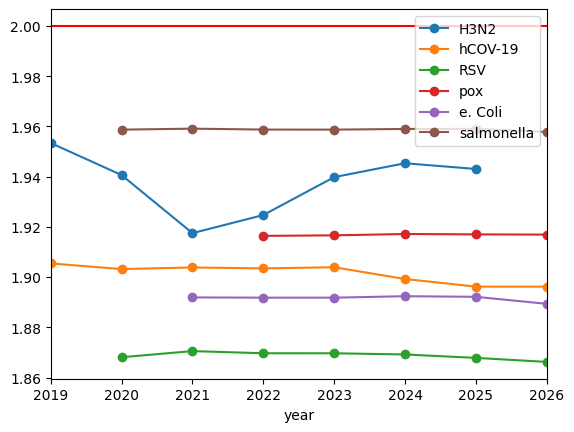

In [61]:
ax=pd.read_csv(CSV[0]).set_index('year')[['avg_bits_per_base_corrected']].plot(style='-o',
                                                                              label='H3N2')
pd.read_csv(CSV[1]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='hCOV-19')
pd.read_csv(CSV[2]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='RSV')
pd.read_csv(CSV[3]).set_index('year')[['avg_bits_per_base_corrected']]\
                            .plot(ax=ax,style='-o',label='pox')
xf.set_index('year').corrected.plot(ax=ax,style='-o',label='ecoli')
xf1.set_index('year').corrected.plot(ax=ax,style='-o',label='salmonella')

plt.plot([2010,2026],[2,2],'-r')
plt.legend(['H3N2','hCOV-19','RSV','pox','e. Coli','salmonella'])
#plt.gca().set_ylim(1.8,2.01)
plt.gca().set_xlim(2019,2026)
